Iniciando muestreo de humedad por estaciones...
Cargando y muestreando: Primavera Año 1...
Cargando y muestreando: Verano Año 1...
Cargando y muestreando: Otoño Año 1...
Cargando y muestreando: Invierno Año 1...

Muestreo completado.
Generando el gráfico y guardando en 'grafico_07_distribucion_humedad_estacional.png'...


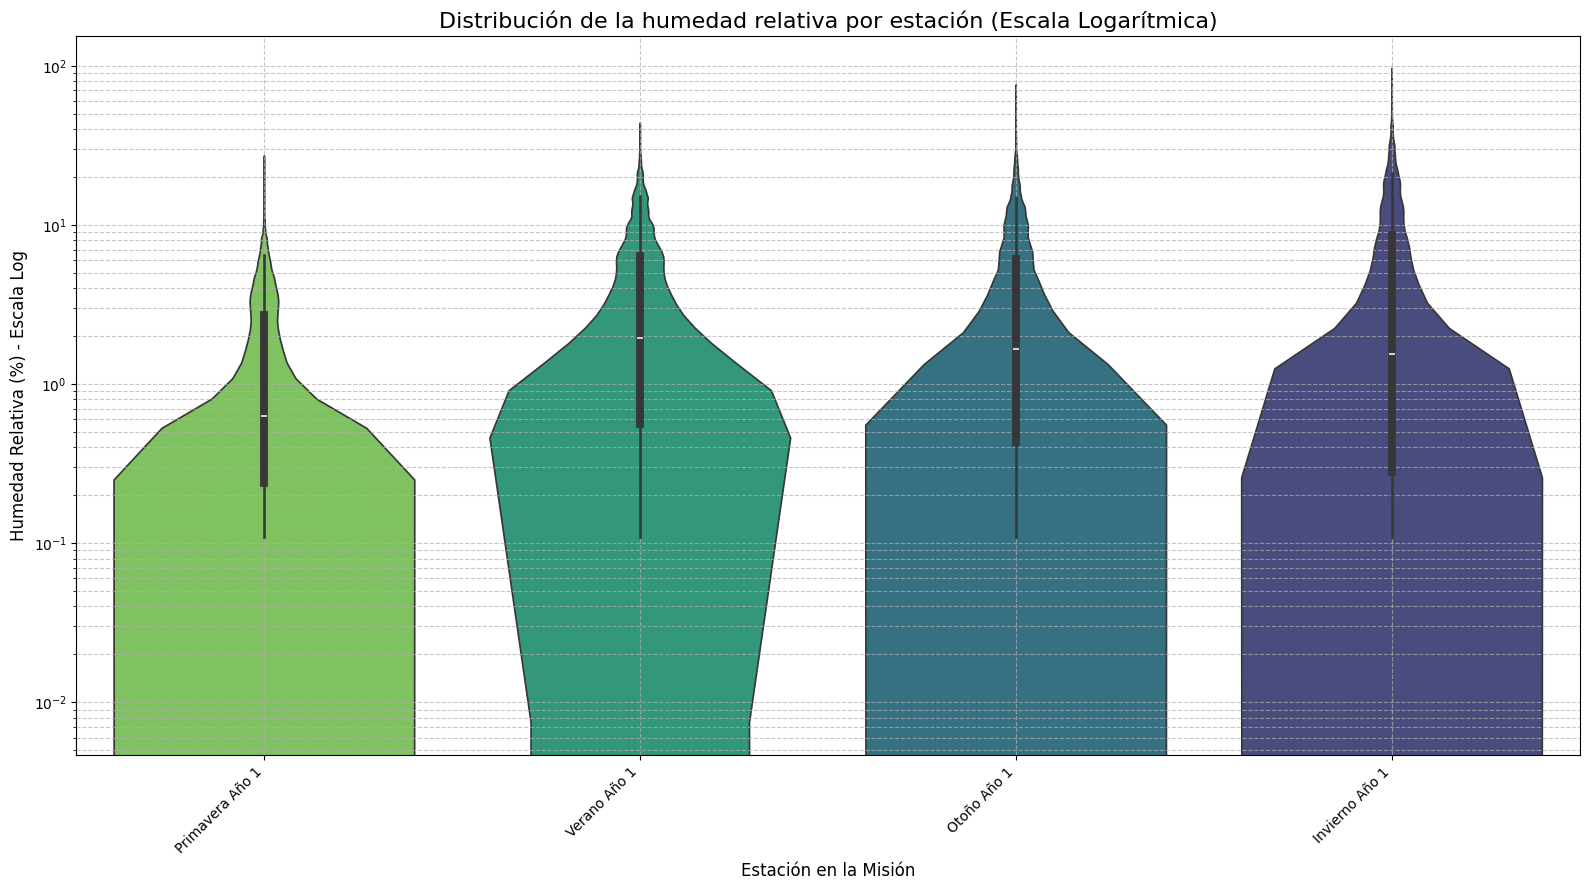

Proceso finalizado. El gráfico fue guardado en 'grafico_07_distribucion_humedad_estacional.png'.


In [2]:
# -*- coding: utf-8 -*-
"""
PLANTILLA ESTÁNDAR APLICADA:
Análisis Comparativo de Humedad Relativa por Estación Marciana.
Utiliza una escala logarítmica para una mejor visualización.
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURACIÓN DEL GRÁFICO Y ANÁLISIS ---

# Parámetros del gráfico
TAMAÑO_FIGURA = (16, 9)
RESOLUCION_DPI = 300
NOMBRE_ARCHIVO_SALIDA = "grafico_07_distribucion_humedad_estacional.png"

# Parámetros del análisis
ARCHIVO_DERIVADO = 'dataset_meda_derived_data.parquet'
MUESTRA_POR_ESTACION = 150000
# Analizaremos solo el primer año marciano para este gráfico
estaciones_a_cargar = {
    "Primavera Año 1": (0, 194), "Verano Año 1": (194, 372),
    "Otoño Año 1": (372, 515), "Invierno Año 1": (515, 668)
}

# --- 2. CARGA Y PREPARACIÓN DE DATOS ---
lista_de_muestras = []
print("Iniciando muestreo de humedad por estaciones...")

for nombre_estacion, (sol_inicio, sol_fin) in estaciones_a_cargar.items():
    print(f"Cargando y muestreando: {nombre_estacion}...")
    try:
        df_estacion = pd.read_parquet(
            ARCHIVO_DERIVADO,
            filters=[('sol', '>=', sol_inicio), ('sol', '<=', sol_fin)],
            columns=['LOCAL_RELATIVE_HUMIDITY', 'sol'] # Cargamos 'sol' también
        ).dropna()
        
        if not df_estacion.empty:
            # Filtramos para quedarnos solo con valores positivos para la escala logarítmica
            df_estacion = df_estacion[df_estacion['LOCAL_RELATIVE_HUMIDITY'] > 0.1]
            
            muestra = df_estacion.sample(n=min(len(df_estacion), MUESTRA_POR_ESTACION), random_state=42)
            muestra['estacion'] = nombre_estacion
            lista_de_muestras.append(muestra)
            
    except Exception as e:
        print(f"  - No se pudieron cargar los datos para {nombre_estacion}. Error: {e}")

if not lista_de_muestras:
    raise SystemExit("Error: No se pudo cargar ninguna muestra de datos.")

df_muestras = pd.concat(lista_de_muestras, ignore_index=True)
print("\nMuestreo completado.")

# --- 3. CREACIÓN DEL GRÁFICO ---
if not df_muestras.empty:
    print(f"Generando el gráfico y guardando en '{NOMBRE_ARCHIVO_SALIDA}'...")
    plt.figure(figsize=TAMAÑO_FIGURA)

    orden_estaciones = list(estaciones_a_cargar.keys())

    # Sintaxis de Seaborn actualizada
    sns.violinplot(
        data=df_muestras, 
        x='estacion', 
        y='LOCAL_RELATIVE_HUMIDITY', 
        hue='estacion', # Se añade hue
        legend=False,   # y legend=False
        order=orden_estaciones,
        palette='viridis_r',
        inner='box'
    )

    plt.yscale('log') # Aplicamos la escala logarítmica

    plt.title('Distribución de la humedad relativa por estación (Escala Logarítmica)', fontsize=16)
    plt.xlabel('Estación en la Misión', fontsize=12)
    plt.ylabel('Humedad Relativa (%) - Escala Log', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.tight_layout()

# --- 4. GUARDADO Y VISUALIZACIÓN ---
    plt.savefig(NOMBRE_ARCHIVO_SALIDA, dpi=RESOLUCION_DPI, bbox_inches='tight')
    plt.show()

    print(f"Proceso finalizado. El gráfico fue guardado en '{NOMBRE_ARCHIVO_SALIDA}'.")
else:
    print("No se encontraron datos de humedad significativos para graficar.")